<a href="https://colab.research.google.com/github/Mehrdad93/Business-ML/blob/master/tweepy_AEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tweepy
#!pip install textblob

In [ ]:
import tweepy
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
consumer_key = 'FgbIgV7ZDXYr6ZzJtPeSzZII0' 
consumer_secret = 'FMZbngbblknOl9V0cLN1jEIKOf5bRUZQywRLEywscoZwiJY7sf'
access_token = '1202266636079661057-6oYzSEvoUvPpRMuGhhPE5Z7n2vihaW'
access_token_secret = '4AVIy797ei74nOeAJatTXDfzk6tRZTGs0Jbu49elG1qqQ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
# twitter_users = []
# tweet_time = []
# tweet_string = []

# # Remove retweets and only include tweets in English
# for tweet in tweepy.Cursor(api.search, q = 'fuel cell', count = 10000).items(10000):
#             if (not tweet.retweeted) and ('RT @' not in tweet.text):
#                 if tweet.lang == "en":
#                     twitter_users.append(tweet.user.name)
#                     tweet_time.append(tweet.created_at)
#                     tweet_string.append(tweet.text)

# X = [twitter_users, tweet_time, tweet_string]
# print(len(twitter_users))

def get_related_tweets(key_word):
    twitter_users = []
    tweet_time = []
    tweet_string = [] 

    for tweet in tweepy.Cursor(api.search, q = key_word, count = 10000).items(10000):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    twitter_users.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)

    df = pd.DataFrame({'name': twitter_users, 'time': tweet_time, 'tweet': tweet_string})
    
    return df


In [ ]:
#get_related_tweets("fuel cell")

,name,time,tweet
0,crosswalk enthusiast,2019-12-04 23:11:13,"@Velovebikes No no, you say, I don't want a ca..."
1,Sun5,2019-12-04 23:06:04,Trans-Atlantic JV Details Battery-Electric and...
2,ZeroAvia,2019-12-04 23:02:04,"Currently, aviation accounts for almost a thir..."
3,tary7873,2019-12-04 22:45:09,@Eyaaaad Hydralight 2 in 1 Emergency Flashligh...
4,Saeed Valadbaygi🇨🇦,2019-12-04 22:33:02,Global Fuel Cell and Battery Market Review 201...
...,...,...,...
1048,Chris Gilbride,2019-11-25 19:44:32,"""the #GoldenState's extreme position in #ener..."
1049,ENGins Biomedical,2019-11-25 19:42:33,Fuel cell for wearables runs on sweat https://...
1050,George Minter,2019-11-25 19:30:55,Sad! We need decisions using #Facts &amp; #Sci...
1051,steve sarsfield,2019-11-25 19:05:35,@MrJamesMay Hi James - I used this (and the ne...


In [ ]:
# sentiment_score = TextBlob("good guy").sentiment.polarity
# print("Sentiment Polarity Score:", sentiment_score)

In [ ]:
# The polarity score is a float with values from -1 to +1
# do not run!
# df = get_related_tweets("fuel cell")
# df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
# print(df.head())

# df_pos = df[df['sentiment'] > 0.0]
# df_neg = df[df['sentiment'] < 0.0]
# print("Number of Positive Tweets", len(df_pos))
# print("Number of Positive Tweets", len(df_neg))

Number of Positive Tweets about renewable energy 1570
Number of Negative Tweets about renewable energy 412
Number of Neutral Tweets about renewable energy 1755


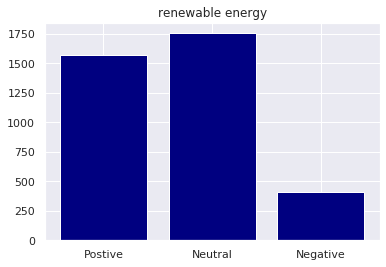

In [ ]:
def get_sentiment(key_word):
    df = get_related_tweets(key_word)
    df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df['sentiment'] > 0.0]
    df_neut = df[df['sentiment'] == 0.0]
    df_neg = df[df['sentiment'] < 0.0]

    print("Number of Positive Tweets about {}".format(key_word), len(df_pos))
    print("Number of Negative Tweets about {}".format(key_word), len(df_neg))
    print("Number of Neutral Tweets about {}".format(key_word), len(df_neut))
    sns.set()
    labels = ['Postive', 'Neutral', 'Negative']
    heights = [len(df_pos), len(df_neut), len(df_neg)]
    plt.bar(labels, heights, color = 'navy')
    plt.title(key_word)
    return(df)
    
#get_sentiment("fuel cell")
df = get_sentiment("renewable energy")

                          name  ... sentiment
0          Sashank Chakraborty  ...  0.800000
6      Er. Kamal Rijal, Ph. D.  ...  0.045455
7                  Mark Boxall  ...  0.800000
10              Joanna Sampson  ...  0.136364
12    HZwo - Prof. von Unwerth  ...  0.500000
..                         ...  ...       ...
437       JoaquimAgustiCoderch  ...  0.800000
439  Family Toyota of Burleson  ...  0.200000
440          Global Automakers  ...  0.368182
441               Colin Murphy  ...  0.150000
443             Franco Ronconi  ...  0.136364

[144 rows x 4 columns]
Number of Positive Tweets about hydrogen fuel cell 144
Number of Negative Tweets about hydrogen fuel cell 58


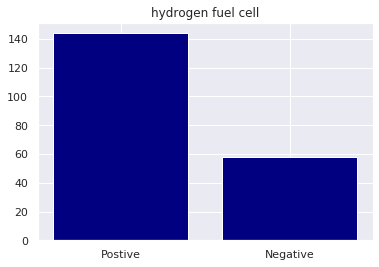

In [ ]:
def get_sentiment(key_word):
    df = get_related_tweets(key_word)
    df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df['sentiment'] > 0.0]
    df_neg = df[df['sentiment'] < 0.0]
    print(df_pos)

    print("Number of Positive Tweets about {}".format(key_word), len(df_pos))
    print("Number of Negative Tweets about {}".format(key_word), len(df_neg))
    sns.set()
    labels = ['Postive', 'Negative']
    heights = [len(df_pos), len(df_neg)]
    plt.bar(labels, heights, color = 'navy')
    plt.title(key_word)
    
get_sentiment("hydrogen fuel cell")

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
y = boston.target
X = pd.DataFrame(boston.data, columns = boston.feature_names)
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [ ]:
X.head()

In [ ]:
y

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.5MB/s 


In [ ]:
# Vader Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(tweets): 

    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 

    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 

    for i in range(len(tweets)):

        sentence = tweets[i]
        sentiment_dict = sid_obj.polarity_scores(sentence) 

        df['sentiment_new'][i:] = sentiment_dict['compound']

    df_pos = df[df['sentiment_new'] > 0.05]
    df_neg = df[df['sentiment_new'] < -0.05]

    print("Number of Positive Tweets about {}".format(key_word), len(df_pos))
    print("Number of Negative Tweets about {}".format(key_word), len(df_neg))
    sns.set()
    labels = ['Postive', 'Negative']
    heights = [len(df_pos), len(df_neg)]
    plt.bar(labels, heights, color = 'navy')
    plt.title(key_word)
    
    return(df)
    

s = df["tweet"]
sentiment_scores(s) 


In [ ]:
s

0       Report Shows Massive Growth in U.K. Energy Sto...
1       Hybrid power: ScottishPower unveils major rene...
2       BP Accused of #greenwashing &amp; deceiving Pu...
3       Another Big Year Could be Looming For Renewabl...
4       There’s more to the renewable energy story - M...
                              ...                        
3732    @caracoesque31 @abandopa The thrust on renewab...
3733    Kid: pilot, international spy, forensic scient...
3734    We are happy to have Felix Muesgens of @BTU_Ne...
3735    @MurderDice I think it’s the best use of renew...
3736    "Gas's price edge over renewable energy techno...
Name: tweet, Length: 3737, dtype: object

In [ ]:
df

,name,time,tweet,sentiment
0,Maia Energy,2019-12-05 16:22:52,Report Shows Massive Growth in U.K. Energy Sto...,0.000000
1,Maia Energy,2019-12-05 16:22:12,Hybrid power: ScottishPower unveils major rene...,0.062500
2,Elena Daniilidou,2019-12-05 16:22:02,BP Accused of #greenwashing &amp; deceiving Pu...,0.000000
3,Green Energy,2019-12-05 16:21:34,Another Big Year Could be Looming For Renewabl...,0.000000
4,Marileeceo,2019-12-05 16:21:04,There’s more to the renewable energy story - M...,0.500000
...,...,...,...,...
3732,Shivangi Tiwari,2019-12-03 16:16:44,@caracoesque31 @abandopa The thrust on renewab...,0.200000
3733,aima,2019-12-03 16:16:35,"Kid: pilot, international spy, forensic scient...",-0.200000
3734,Wolf Ketter,2019-12-03 16:16:09,We are happy to have Felix Muesgens of @BTU_Ne...,0.400000
3735,⚔️bloodyjackyl⚔️,2019-12-03 16:16:09,@MurderDice I think it’s the best use of renew...,1.000000
